In [1]:
from random import *
import numpy as np
import matplotlib.pyplot as plt
from math import *
from itertools import product, repeat
plt.style.use("ggplot")
get_ipython().magic('matplotlib inline')

In [2]:
def check(a):
    for i in a: 
        if i[0] > maxi or i[1] > maxi: return 0
    else: return 1

In [3]:
def check_howmany(a):
    result = 0
    for i in a: 
        if i[0] > maxi or i[1] > maxi: result += 1
    return result/a.shape[0]
    


## discretize a point in a (3,3) matrix

In [4]:
def findquadrant(point,size):
    y,x = point
    halfsize = size/2
    if x < -halfsize:
        if y > halfsize: return [0,0]
        if y < -halfsize: return [2,0]
        return [1,0]
    if x > halfsize:
        if y > halfsize: return [0,2]
        if y < -halfsize: return [2,2]
        return [1,2]
    if y > halfsize: return [0,1]
    if y < -halfsize: return [2,1]
    return [1,1]

## randomwalk each point for 1 day equivalent

In [5]:
def randomWalk(points, nonacessquadrants, size):
    tempo = 0
    dt = 2
    while tempo < 60*24:#while check_howmany(points) < 0.05:
        for i in points:
            a = uniform(0, 2*pi)
            vvar, hvar = V*dt*sin(a), V*dt*cos(a)
            i[0] += vvar; i[1] += hvar
            if findquadrant(i, size) in nonacessquadrants: i[0] -= 2*vvar    
            if findquadrant(i, size) in nonacessquadrants: i[0] += 2*vvar; i[1] -= 2*hvar
            if findquadrant(i, size) in nonacessquadrants: i[0] -= 2*vvar
        tempo += dt
    return points


## make a grid from a scatter of many points

In [6]:
def gridify(somelist, size):
    shape = (3,3)
    grid = np.zeros(shape)
    for point in somelist:
        quadrant = findquadrant(point,size)
        grid[quadrant[0]][quadrant[1]] += 1
    grid = grid/grid.sum()
    return np.array(grid)


In [7]:
V = 100/60 #meters per minute
dt = 2 #min
npoints = 20000
size = 68
def newpoints(n):
    return np.array([[uniform(-size/2,size/2),uniform(-size/2,size/2)] for i in range(n)])

In [8]:
print((68*sqrt(2)/2./61)*1000/60 )#number of hours in old model

13.13750303843859


In [9]:
%%time
newgrid = gridify(randomWalk(newpoints(npoints), [], size), size)


CPU times: user 2min 42s, sys: 224 ms, total: 2min 43s
Wall time: 2min 43s


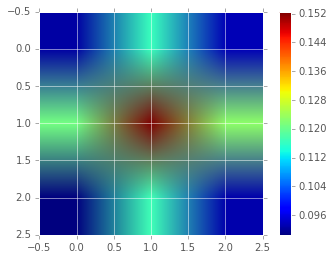

[[ 0.09265  0.11655  0.09365]
 [ 0.12105  0.15255  0.12295]
 [ 0.09055  0.11695  0.0931 ]]
CPU times: user 336 ms, sys: 248 ms, total: 584 ms
Wall time: 292 ms


In [10]:
%%time
plt.imshow(newgrid)
plt.colorbar()
plt.show()
print(newgrid)

matrix generator for geting all possible combinations of matrix
<pre>
0 | 3 | 5 
1 | X | 6 
2 | 4 | 7
</pre>

In [11]:
%%time
allmatrices = list(product(*(repeat((0, 1), 8))))
len(allmatrices)
dictionary_matrix_to_num = {}
dict_num_to_weights = {}
for index, case in enumerate(allmatrices):
    dictionary_matrix_to_num[case] = index
    somelist = []
    if case[0] == 1: somelist += [[0,0]]
    if case[1] == 1: somelist += [[1,0]]
    if case[2] == 1: somelist += [[2,0]]
    if case[3] == 1: somelist += [[0,1]]
    if case[4] == 1: somelist += [[2,1]]
    if case[5] == 1: somelist += [[0,2]]
    if case[6] == 1: somelist += [[1,2]]
    if case[7] == 1: somelist += [[2,2]]
    if index%5 == 0: print(index, case, somelist) 
    dict_num_to_weights[index] = gridify(randomWalk(newpoints(npoints), somelist, size), size)
    

CPU times: user 2min 24s, sys: 172 ms, total: 2min 25s
Wall time: 2min 25s
CPU times: user 2min 37s, sys: 48 ms, total: 2min 37s
Wall time: 2min 37s
CPU times: user 2min 33s, sys: 28 ms, total: 2min 33s
Wall time: 2min 34s
CPU times: user 2min 27s, sys: 44 ms, total: 2min 27s
Wall time: 2min 27s
CPU times: user 2min 38s, sys: 40 ms, total: 2min 38s
Wall time: 2min 38s
CPU times: user 2min 35s, sys: 64 ms, total: 2min 35s
Wall time: 2min 35s
CPU times: user 2min 38s, sys: 72 ms, total: 2min 38s
Wall time: 2min 38s
CPU times: user 2min 33s, sys: 60 ms, total: 2min 33s
Wall time: 2min 33s
CPU times: user 2min 34s, sys: 72 ms, total: 2min 34s
Wall time: 2min 34s
CPU times: user 2min 46s, sys: 64 ms, total: 2min 46s
Wall time: 2min 46s
CPU times: user 2min 34s, sys: 28 ms, total: 2min 34s
Wall time: 2min 34s
CPU times: user 2min 37s, sys: 48 ms, total: 2min 37s
Wall time: 2min 37s
CPU times: user 2min 32s, sys: 24 ms, total: 2min 32s
Wall time: 2min 32s
CPU times: user 2min 29s, sys: 12 ms,

[[ 0.09405  0.1219   0.0944 ]
 [ 0.121    0.1484   0.1163 ]
 [ 0.0944   0.1174   0.09215]]


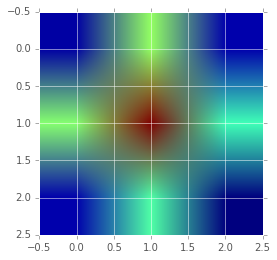

In [12]:
a = dict_num_to_weights[0]
print(a)
plt.imshow(dict_num_to_weights[0])
plt.show()

In [15]:
import pickle as pkl
MyDicts = [dictionary_matrix_to_num, dict_num_to_weights]
pkl.dump( MyDicts, open( "myDicts.p", "wb" ) )
#to read the pickled dicts use:
# dictionary_matrix_to_num, dict_num_to_weights = pkl.load( open ("myDicts.p", "rb") )


